In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

df = pd.read_csv("data_clean.csv")
del df["Unnamed: 0"]

df['tax_class_at_time_of_sale'] = df['tax_class_at_time_of_sale'].astype('category')
df['tax_class_at_present'] = df['tax_class_at_present'].astype('category')
df['building_class category'] = df['building_class category'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['borough'] = df['borough'].astype('category')
df['building_class_at_time_of_sale'] = df['building_class_at_time_of_sale'].astype('category')
df['building_class_at_present'] = df['building_class_at_present'].astype('category')

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(df)

# Labels are the values we want to predict
labels = np.array(features['sale_price'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('sale_price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 1337)

print('Training Features Shape:', train_features.shape)
print('Training Target Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Target Shape:', test_labels.shape)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
rf.fit(train_features, train_labels);

Training Features Shape: (19693, 476)
Training Target Shape: (19693,)
Testing Features Shape: (6565, 476)
Testing Target Shape: (6565,)


Mean Absolute Error: 185191.23
(1000, 6565)
Variable: gross_square_feet    Importance: 0.33
Variable: block                Importance: 0.23
Variable: land_square_feet     Importance: 0.07
Variable: lot                  Importance: 0.04
Variable: age_of_building      Importance: 0.04
Variable: borough_Bronx        Importance: 0.03
Variable: borough_Brooklyn     Importance: 0.03
Variable: borough_Queens       Importance: 0.02
Variable: borough_Staten_Island Importance: 0.02
Variable: residential_units    Importance: 0.01
Variable: total_units          Importance: 0.01
Variable: borough_Manhattan    Importance: 0.01
Variable: neighborhood_PARK SLOPE Importance: 0.01
Variable: commercial_units     Importance: 0.0
Variable: neighborhood_AIRPORT LA GUARDIA Importance: 0.0
Variable: neighborhood_ALPHABET CITY Importance: 0.0
Variable: neighborhood_ANNADALE Importance: 0.0
Variable: neighborhood_ARDEN HEIGHTS Importance: 0.0
Variable: neighborhood_ARROCHAR Importance: 0.0
Variable: neighborhoo

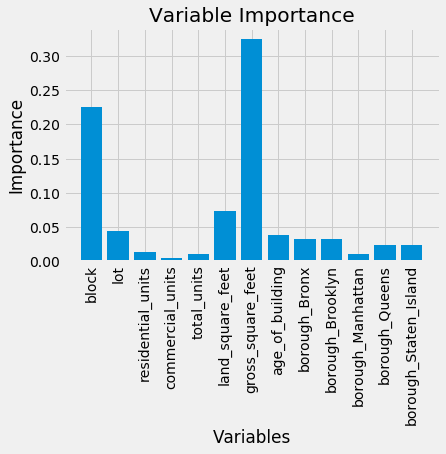

In [2]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

predictions_all = np.array([tree.predict(test_features) for tree in rf.estimators_])
print(predictions_all.shape)

np.mean(predictions_all,axis=0)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values[:13], importances[:13], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values[:13], feature_list[:13], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variables'); plt.title('Variable Importance');

Training Features Shape: (19693, 13)
Training Labels Shape: (19693,)
Testing Features Shape: (6565, 13)
Testing Labels Shape: (6565,)
Variable: gross_square_feet    Importance: 0.34
Variable: block                Importance: 0.27
Variable: land_square_feet     Importance: 0.09
Variable: lot                  Importance: 0.06
Variable: age_of_building      Importance: 0.05
Variable: residential_units    Importance: 0.03
Variable: borough_Bronx        Importance: 0.03
Variable: borough_Brooklyn     Importance: 0.03
Variable: borough_Queens       Importance: 0.03
Variable: borough_Staten_Island Importance: 0.03
Variable: total_units          Importance: 0.02
Variable: commercial_units     Importance: 0.01
Variable: borough_Manhattan    Importance: 0.01
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


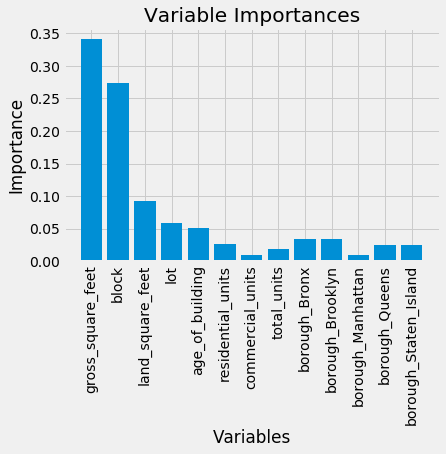

In [3]:
df = pd.read_csv("data_clean.csv")
del df["Unnamed: 0"]

df = df[["gross_square_feet","block","land_square_feet","lot","age_of_building","borough","residential_units","commercial_units","total_units","sale_price"]]
df['borough'] = df['borough'].astype('category')

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(df)

# Labels are the values we want to predict
labels = np.array(features['sale_price'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('sale_price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 1337)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
rf.fit(train_features, train_labels);

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values[:13], importances[:13], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values[:13], feature_list[:13], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variables'); plt.title('Variable Importances');

rf.get_params()

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=1337,
                               n_jobs = -1)
rf_random.fit(train_features, train_labels)

In [ ]:
print(predictions_all)